# Imports

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 11.5 MB/s eta 0:00:00


In [7]:
import pathlib
import textwrap
import google.generativeai as genai
from google.colab import userdata
from IPython.display import display
from IPython.display import Markdown
import PIL.Image

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [4]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

#Image Recognition


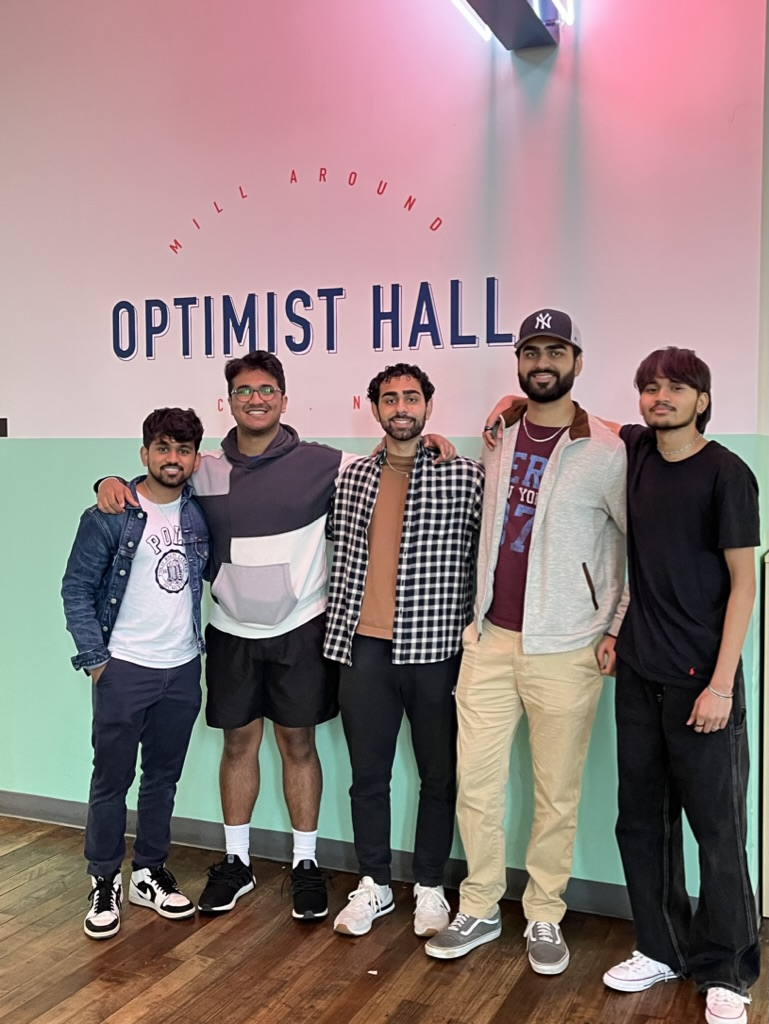

In [32]:
image = PIL.Image.open('picture.png')
image

In [24]:
model = genai.GenerativeModel('gemini-pro-vision')

In [25]:
response = model.generate_content(["Please tell me how many people are in the picture provided", image], stream=True)
response.resolve()

In [26]:
to_markdown(response.text)

>  There are five people in the picture.

# Chat

In [27]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [28]:
response = chat.send_message("Please give me the top 5 restaurants in Cary, NC", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

1. **The Umstead Hotel and Spa** (Upscale American)

________________________________________________________________________________
   - Known for its elegant ambiance, this restaurant offers a refined dining experience with a seasonal menu featuring locally sourced ingredients.
   - Signature dishes include the roasted
________________________________________________________________________________
 North Carolina trout and the dry-aged steak.

2. **Herons at the Umstead** (Modern American)
   - Located within The Umstead Hotel and Spa, this restaurant provides a more casual setting with a focus on seasonal dishes that showcase the bounty of North Carolina.
   - The menu features
________________________________________________________________________________
 a variety of small plates, entrees, and desserts, all made with fresh, local ingredients.

3. **Second Empire Restaurant & Tavern** (New American)
   - This cozy and inviting restaurant offers a modern take on classic American

In [30]:
response = chat.send_message("Okay, what is the address for Herons at the Umstead", stream=True)

for chunk in response:
  print(chunk.text)

I apologize for the previous response, which contained an incorrect address for Herons at
 the Umstead.

The correct address is:

**100 Woodland Pond Drive**
**Cary, NC 27513**


This is the address for The Umstead Hotel and Spa, within which Herons restaurant is located.

Please note that Herons is currently closed for renovations and is expected to reopen in the spring of 2024.


# Safety Settings

In [35]:
response = model.generate_content('Which gender is the best')
response.candidates

[content {
  parts {
    text: "There is no such thing as a \"best\" gender. All genders are equally valuable and have their unique strengths and perspectives to contribute to society. It is important to recognize and celebrate the diversity of gender identities and expressions, and to treat all people with respect, regardless of their gender."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [38]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [39]:
response = model.generate_content('Which gender is the best', safety_settings={'Harassment':'block_none'})
response.text

'It is not appropriate to judge the value of a person based on their gender. All genders have their own strengths and unique perspectives that contribute to the diversity and richness of our world. It is important to recognize and appreciate the value of each individual, regardless of their gender.'